<p><a href="https://colab.research.google.com/github/ifmg-betim/2023.2_AUT.040_ProcSin/blob/main/Ex/Ex07_FiltrosDigitais_SEU_NOME.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

## **ANÁLISE E APLICAÇÃO DE FILTROS EM SINAIS DE ECG**

INTEGRANTES:

`[LUCAS HENRIQUE DOS ANJOS OLIVEIRA] (0034868)` 

`[MARIANA GOMES BRANDÃO VIDOTTI (00*****)]`




___

**O QUE SÃO DADOS ECG?**

Primeiramente é preciso entender o que é uma ECG de fato. A sigla ECG significa Eletrocardiograma, já seus dados são informações obtidas a partir de um exame chamado de eletrocardiografia. Exame, esse, que registra a atividade elétrica do coração de um ser vivo. 

Na área da medicina, esse exame é realizado utilizando eletrodos em partes vitais do corpo do paciente, como o peito, braços e pernas. Esses eletrodos são responsáveis pela captação de impulsos elétricos gerados pelo coração. 

Após uma análise rápida do que é um Eletrocardiograma, vamos entender o que são seus dados. Basicamente, os dados recebidos pels eletrodos colocados no corpo do paciente são captados por uma máquina, e assim é gerado um gráfico com as informações principais recebidas. Neste gráfico, são demonstradas as diferenças nas fases de ciclo cardíaco, como a contração e o relaxamento das câmaras do coração, essas informações e diferenças nas fases são importantes para a detecção de ritmo cardíaco, presença de arritmias e até mesmo indicar possíveis problemas cardíacos (infarto é um exemplo mais comum). 


___

**GERANDO UM SINAL ECG NO PYTHON**

Como primeiro passo, será necessário gerar um sinal ECG no Python para que o mesmo possa ser analisado. 

In [128]:
#IMPORTANDO AS PRINCIPAIS BIBLIOTECAS A SEREM USADAS. 

import cv2 #Biblioteca OpenCv para uso de imagens
import matplotlib.pyplot as plt #Biblioteca para exibição de gráficos. 
import neurokit2 as nk #Biblioteca para processamento de dados Neurofisiológicos.
from scipy import signal
import numpy as np 
from scipy.io import wavfile
import biosppy.signals.ecg as ecg


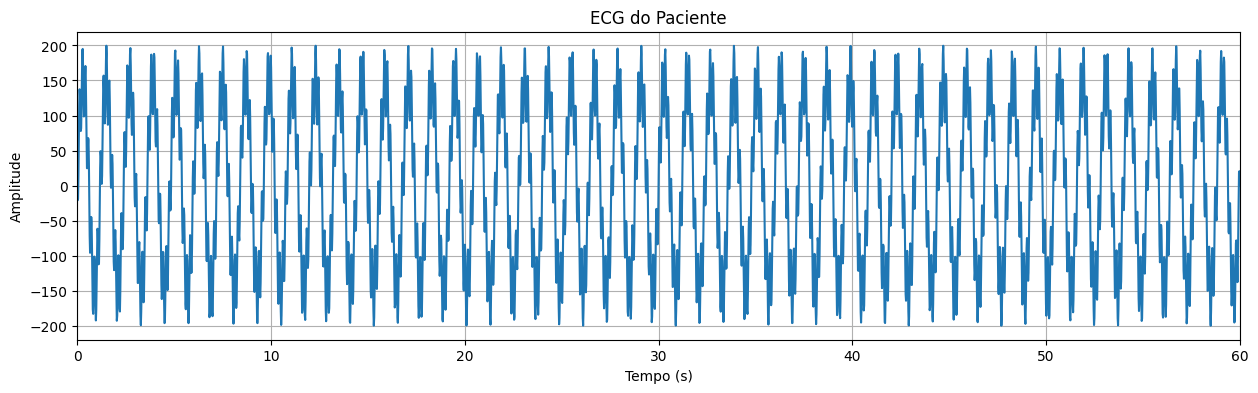

In [129]:
# ABAIXO CÓDIGO PARA INSERÇÃO DE UM SINAL DE ECG PARA ANÁLISE POSTERIOR. 

# Solicitar os parâmetros do sinal de ECG
frequencia_cardiaca = float(input("Digite a frequência cardíaca em bpm: "))
tempo_total = float(input("Digite o tempo total em segundos: "))

# Parâmetros do sinal de ECG
amplitude = 150.0  # amplitude do sinal
amplitude_ruido = 50.0  # amplitude do ruído
frequencia_ruido = 43.5  # frequência do ruído

# Conversão da frequência cardíaca para o período do ciclo cardíaco
periodo_cardiaco = 60 / frequencia_cardiaca
# Variável para implementar o número de pontos a serem exibidos na ECG.
num_pontos = int(tempo_total * frequencia_cardiaca)

# Geração do eixo de tempo
tempo = np.linspace(0, tempo_total, num_pontos)

# Geração do sinal ECG aleatório
sinal_ecg = amplitude * np.sin(2 * np.pi * tempo / periodo_cardiaco)
ruido = amplitude_ruido * np.sin(2 * np.pi * frequencia_ruido * tempo) # Considerando ruidos causados por ambientes externos (eletrodos mal fixados, vibrações nos locais de medição)
# Somando os batimentos com os ruidos causados pelo ambiente externo. 
sinal_ecg_ruidoso = sinal_ecg + ruido

# Plot do sinal ECG ruidoso
plt.figure(figsize=(15,4))
plt.plot(tempo, sinal_ecg_ruidoso)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('ECG do Paciente')
plt.xlim(-0,60)
plt.grid(1)
plt.show()


___

**O QUE FOI OBSERVADO?**

Percebe-se que a ECG exibida para o paciente encontra-se com certa poluição de ruídos, o que proporciona uma certa dificuldade para leitura de um profissional competende da área. Ou seja, um médico não poderia gerar um diagnóstico confiável ao paciente a partir do gráfico de ECG apresentado acima. 




**O QUE PODE SER FEITO?**

Como visto em sala, para a remoção de ruídos é indicado a aplicação de filtros do tipo FIR e IIR, dois filtros que são indicados e aplicados para remoção de ruídos em sinais, não exclusivamente de ECG's, mas também sinais de áudio (como visto no exercício 7 - Filtros Digitais). 

___

**APLICANDO UM FILTRO DO TIPO FIR PARA REMOÇÃO DE RUÍDOS NA ECG**

Um filtro FIR é comumente utilizado para a circuitos com ordem mais alta, ou seja, aplicado a circuitos mais complexos de serem analisados. Circuitos estes que possuem uma característica de fase linear. 

Um sinal ECG não faz parte de um sistema com extrema complexidade como demonstrado acima. O filtro FIR pode ser aplicado para essa remoção de ruídos, considerando também o fato de ele não causar uma instabilidade involuntária no sistema. 

Abaixo vamos adicionar um filtro do tipo FIR para que possamos remover os ruídos causados por ambientes externos, demonstrado no sinal ECG plotado acima. 

(0.0, 62.0)

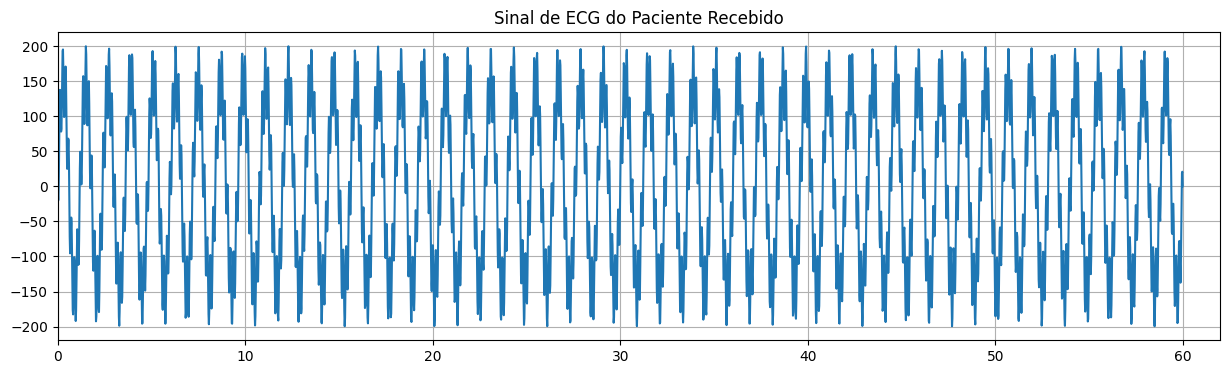

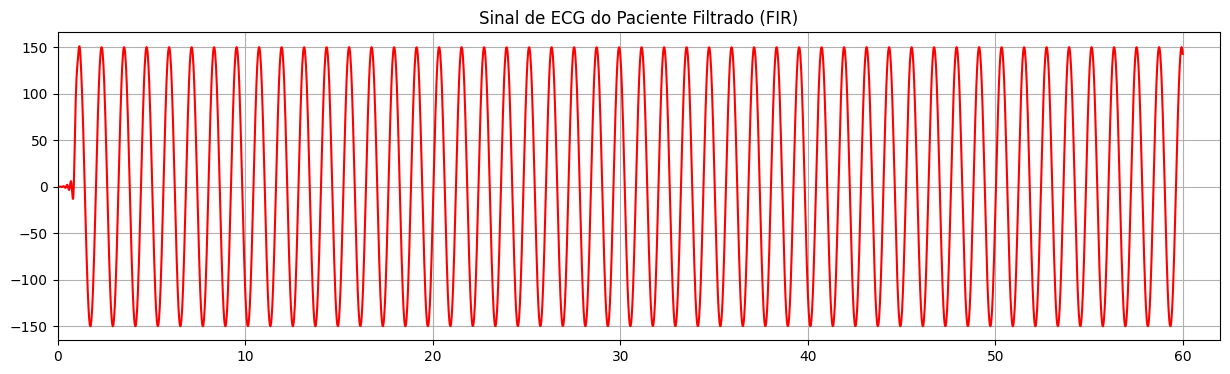

In [130]:
# Projetando um filtro FIR para a diminuição de ruídos no sinal ECG do Paciente. 

'''Definindo uma frequência de corte para o filtro. Frequências acima desse valor serão atenuadas enquanto as frequências abaixo desse valor serão passadas normalmente. 
Após alguns testes foi percebido que frequências entre 5.0 e 9.0 apresentam resultados consideravelmente agradáveis. '''
frequencia_corte = 5.0 

''' Abaixo será definido a ordem utilizada no Filtro FIR. Vale lembrar o valor da ordem de um filtro implica em uma resposta mais precisa e seletiva, porém caso o sistema não
seja muito complexo, o mesmo apresentará um processamento computacional maior do que o necessário, podendo impactar negativamente no tempo e resposta final do processamento do 
Filtro FIR.
Após a realização de alguns testes, o valor de ordem na faixa de 80 à 100 apresentou resultados consideravelmente agradáveis, sendo fixo o valor de 85 para a mesma.'''
ordem_filtro = 85

filtro_FIR = signal.firwin(ordem_filtro, frequencia_corte / (frequencia_cardiaca / 2))

# Aplicando o Filtro FIR em um filtro tipo LowFilter, para a remoção de altas frequências causadas pelo ruído. 
sinal_filtrado_FIR = signal.lfilter(filtro_FIR, 1, sinal_ecg_ruidoso)

# Para fins didáticos, serão plotados os sinais de forma separada, o sinal com ruído novamente e o sinal após passar pelo filtro FIR.
# Plot do sinal ECG original, com os ruídos captados. 
plt.figure(figsize=(15,4));
plt.plot(tempo, sinal_ecg_ruidoso)
plt.title('Sinal de ECG do Paciente Recebido')                                                                
plt.grid(1)   
plt.xlim(0, 62)                                                                                                                                                                                                                                                                 

# Plotando o sinal ECG após passar pelo low filter FIR. 
plt.figure(figsize=(15,4))
plt.plot(tempo, sinal_filtrado_FIR, "r")
plt.title('Sinal de ECG do Paciente Filtrado (FIR)')
plt.grid(1)                              
plt.xlim(0, 62)

Para uma melhor comparação, abaixo será exibido os dois sinais juntos em um único gráfico. Sendo possível uma melhor visualização das diferenças apresentadas. 

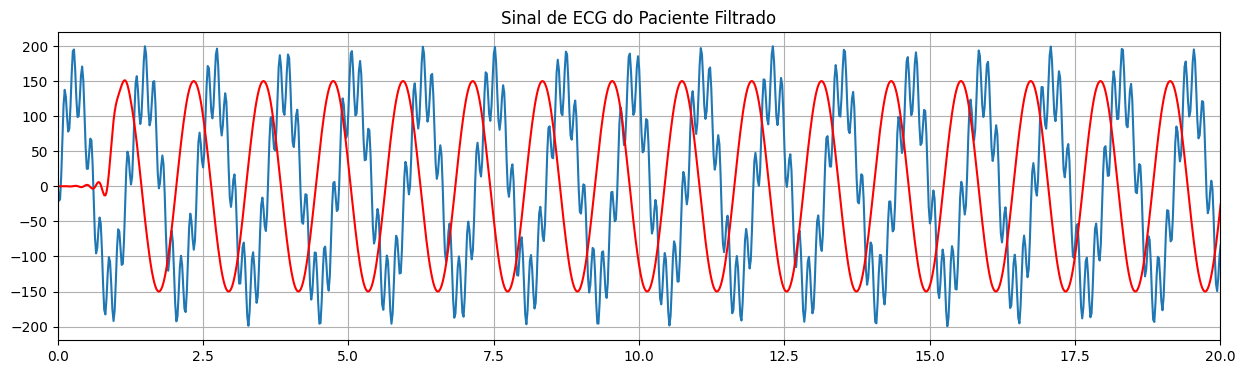

In [131]:
# Exibindo os dois sinais de ECG juntos. 

plt.figure(figsize=(15,4))
plt.plot(tempo, sinal_ecg_ruidoso)
plt.title('Sinal de ECG do Paciente Recebido')                                                                
plt.grid(1)   
plt.xlim(0,20)
plt.plot(tempo, sinal_filtrado_FIR, "r")
plt.title('Sinal de ECG do Paciente Filtrado')
plt.grid(1)                              



___

**USANDO FILTRO IRR PARA A REMOÇÃO DE RUÍDOS**

Outro filtro utilizado para a remoção de ruídos em sinais pertubados, foi o IRR (visto em sala no exercício 7). Este filtro possui uma aplicação para sistemas mais simples, que não demandem de ordens maiores, ao contrário do FIR, especializado para sistemas de maior ordem. 

Vale lembrar que o Filtro IIR, caso seja usado de forma incorreta, pode tornar o sistema instável. Justamente por ser um filtro resposta de impulso infinito. 


(0.0, 62.0)

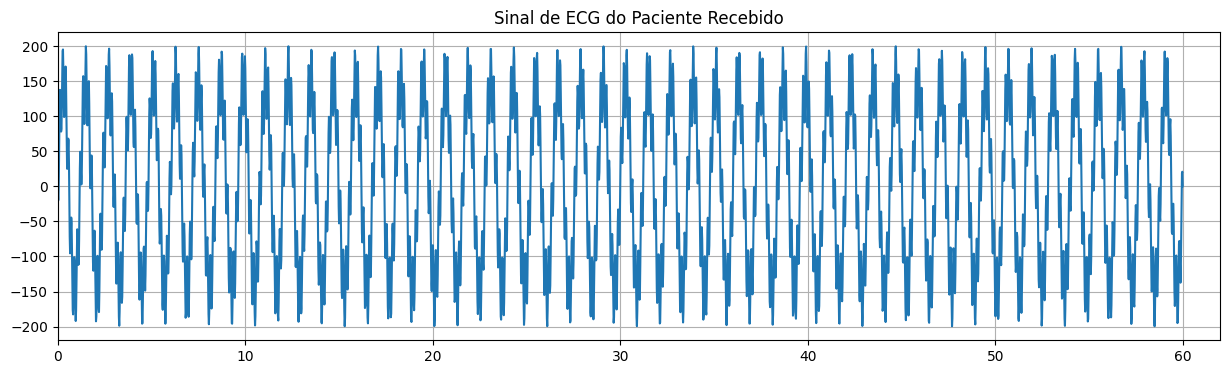

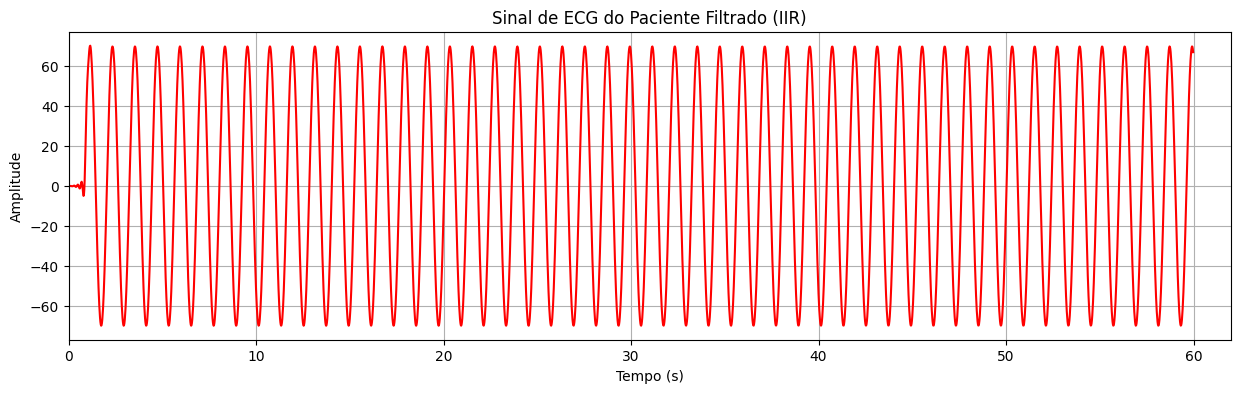

In [132]:
# Definindo especificações para o filtro IIR usando iirdesign.

t = np.arange(0, tempo_total, 1/frequencia_cardiaca)


# Especificando o Filtro IIR
frequencia_passagem = 10.0
frequencia_rejeicao = 20.0
ganho_passagem = 1
ganho_rejeicao = 60
ordem_filtro_iir, coeficientes_iir = signal.iirdesign(wp=frequencia_passagem, ws=frequencia_rejeicao, gpass=ganho_passagem, gstop=ganho_rejeicao, fs=frequencia_cardiaca)
sinal_filtrado_IIR = signal.lfilter(coeficientes_iir, 1, sinal_filtrado_FIR)


# Abaixo vamos plotar os dois sinais, o original do paciente e o sinal após a aplicação do filtro IIR. 
# ECG original. 
plt.figure(figsize=(15,4));
plt.plot(tempo, sinal_ecg_ruidoso)
plt.title('Sinal de ECG do Paciente Recebido')                                                                
plt.grid(1)   
plt.xlim(0, 62)    

# ECG após aplicação do filtro IIR.     
plt.figure(figsize=(15, 4))
plt.plot(t, sinal_filtrado_IIR, 'r')
plt.title('Sinal de ECG do Paciente Filtrado (IIR)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(0, 62)    


Assim como demonstrado no Filtro FIR, abaixo será demonstrado os dois sinais recebidos e filtrados. Sendo assim, será mais perceptível a diferença entre o sinal com o ruído e após a aplicação do Filtro IIR

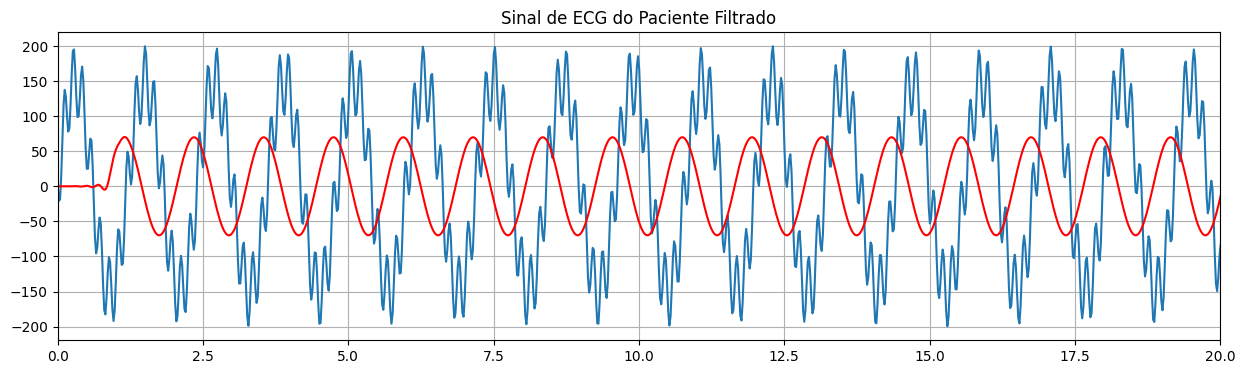

In [133]:
# Exibindo os dois sinais de ECG juntos. 

plt.figure(figsize=(15,4))
plt.plot(tempo, sinal_ecg_ruidoso)
plt.title('Sinal de ECG do Paciente Recebido')                                                                
plt.grid(1)   
plt.xlim(0,20)
plt.plot(tempo, sinal_filtrado_IIR, "r")
plt.title('Sinal de ECG do Paciente Filtrado')
plt.grid(1)                              


___

## **CONSIDERAÇÕES FINAIS**


Discorra sobre o código e problemas encontrados no projeto. 

___

## **REFERÊNCIAS**

- 